In [1]:
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [2]:
path = "./data/forecast_data_origin.csv"
data_org = pd.read_csv(path)
print(data_org['condition'].value_counts())
data_org.head(10)
num_columns = data_org.shape[1]
print(num_columns)
data_org.describe()

condition
{'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}                                  6377
{'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}                                    5895
{'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}                          2649
{'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}                            2477
{'text': 'Patchy rain possible', 'icon': '//cdn.weatherapi.com/weather/64x64/day/176.png', 'code': 1063}                     1898
{'text': 'Light rain shower', 'icon': '//cdn.weatherapi.com/weather/64x64/day/353.png', 'code': 1240}                        1859
{'text': 'Light rain shower', 'icon': '//cdn.weatherapi.com/weather/64x64/night/353.png', 'code': 1240}                      1811
{'text': 'Patchy rain possible', 'icon': '//cdn.weatherapi.com/weather/64x64/nig

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph
count,2.956800e+04,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,...,29568.000000,29568.000000,29568.000000,29568.000000,29568.0,29568.0,29568.000000,29568.000000,29568.000000,29568.000000
mean,1.634580e+09,25.152307,77.273793,0.477070,5.077486,8.169619,177.818452,1008.341112,29.775472,0.101552,...,18.650761,65.571567,0.089928,12.155202,0.0,0.0,9.263460,5.488433,7.947697,12.791274
std,1.995536e+05,4.797702,8.635461,0.499482,2.847123,4.582337,103.545331,3.438631,0.101294,0.406883,...,5.715956,10.288746,0.286084,24.999675,0.0,0.0,1.986747,1.281815,4.141102,6.665310
min,1.634227e+09,1.500000,34.700000,0.000000,0.000000,0.000000,0.000000,999.000000,29.490000,0.000000,...,-8.200000,17.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.634408e+09,22.500000,72.600000,0.000000,3.100000,4.900000,83.000000,1006.000000,29.690000,0.000000,...,16.000000,60.800000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,4.900000,7.900000
50%,1.634580e+09,25.100000,77.200000,0.000000,4.500000,7.200000,174.000000,1008.000000,29.780000,0.000000,...,20.400000,68.700000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,7.300000,11.800000
75%,1.634753e+09,28.100000,82.600000,1.000000,6.500000,10.400000,273.000000,1011.000000,29.850000,0.040000,...,22.900000,73.300000,0.000000,3.000000,0.0,0.0,10.000000,6.000000,10.400000,16.700000
max,1.634958e+09,39.300000,102.700000,1.000000,22.400000,36.000000,359.000000,1021.000000,30.160000,20.930000,...,30.200000,86.400000,1.000000,94.000000,0.0,0.0,10.000000,6.000000,32.700000,52.600000


In [3]:
path = "./data/forecast_data.csv"
data = pd.read_csv(path)
print(data['condition'].value_counts())
data.head()

condition
{'text': 'Rainy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/119.png', 'code': 1006}      9372
{'text': 'Cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/119.png', 'code': 1006}     7924
{'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}    6377
{'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}      5895
Name: count, dtype: int64


,time_epoch,time,temp_c,temp_f,is_day,condition,wind_mph,wind_kph,wind_degree,wind_dir,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,state,city
0,1634236200,10/15/2021 0:00,23.2,73.8,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.3,6.8,41,NE,...,0,0,0,0,10.0,6,8.9,14.4,Andhra Pradesh,Amaravati
1,1634239800,10/15/2021 1:00,23.0,73.3,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.1,6.6,34,NE,...,0,0,0,0,10.0,6,8.6,13.9,Andhra Pradesh,Amaravati
2,1634243400,10/15/2021 2:00,22.7,72.9,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",4.0,6.4,28,NNE,...,0,0,0,0,10.0,6,8.4,13.4,Andhra Pradesh,Amaravati
3,1634247000,10/15/2021 3:00,22.5,72.5,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.8,6.1,22,NNE,...,0,0,0,0,10.0,6,8.1,13.0,Andhra Pradesh,Amaravati
4,1634250600,10/15/2021 4:00,22.3,72.1,0,"{'text': 'Clear', 'icon': '//cdn.weatherapi.co...",3.7,6.0,23,NNE,...,0,0,0,0,10.0,6,7.9,12.7,Andhra Pradesh,Amaravati


In [4]:
data.dropna()
data.describe()

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph
count,2.956800e+04,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,...,29568.000000,29568.000000,29568.000000,29568.000000,29568.0,29568.0,29568.000000,29568.000000,29568.000000,29568.000000
mean,1.634580e+09,25.152307,77.273793,0.477070,5.077486,8.169619,177.818452,1008.341112,29.775472,0.101552,...,18.650761,65.571567,0.089928,12.155202,0.0,0.0,9.263460,5.488433,7.947697,12.791274
std,1.995536e+05,4.797702,8.635461,0.499482,2.847123,4.582337,103.545331,3.438631,0.101294,0.406883,...,5.715956,10.288746,0.286084,24.999675,0.0,0.0,1.986747,1.281815,4.141102,6.665310
min,1.634227e+09,1.500000,34.700000,0.000000,0.000000,0.000000,0.000000,999.000000,29.490000,0.000000,...,-8.200000,17.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.634408e+09,22.500000,72.600000,0.000000,3.100000,4.900000,83.000000,1006.000000,29.690000,0.000000,...,16.000000,60.800000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,4.900000,7.900000
50%,1.634580e+09,25.100000,77.200000,0.000000,4.500000,7.200000,174.000000,1008.000000,29.780000,0.000000,...,20.400000,68.700000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,7.300000,11.800000
75%,1.634753e+09,28.100000,82.600000,1.000000,6.500000,10.400000,273.000000,1011.000000,29.850000,0.040000,...,22.900000,73.300000,0.000000,3.000000,0.0,0.0,10.000000,6.000000,10.400000,16.700000
max,1.634958e+09,39.300000,102.700000,1.000000,22.400000,36.000000,359.000000,1021.000000,30.160000,20.930000,...,30.200000,86.400000,1.000000,94.000000,0.0,0.0,10.000000,6.000000,32.700000,52.600000


In [5]:
from sklearn import preprocessing 
X = np.array(data[['feelslike_c','wind_kph','pressure_mb','humidity','vis_km','cloud']]) # input features
scaler = preprocessing.StandardScaler().fit(X) # use to fit with data using fit method. The fit method caculates the mean and standard devitation for each feature in X
X = scaler.transform(X) # được gọi trên đối tượng X để chuẩn hóa các đặc trưng trong X
Y = []
print(len(X))
condition = np.array(data['condition'])
count = [0,0,0,0]
for i in range(len(X)):
  if condition[i][10:15] == 'Rainy':
    Y.append(3) 
    count[3]+=1
  elif condition[i][10:15]  == 'Sunny':
    Y.append(2)
    count[2]+=1
  elif condition[i][10:15] == 'Cloud':
    Y.append(1)
    count[1]+=1
  else:
    Y.append(0)
    count[0]+=1

Y = (np.array(Y))
print(X.shape,Y.shape)
count


29568
(29568, 6) (29568,)


[6377, 7924, 5895, 9372]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [7]:

#--------------------------------#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
knn = KNeighborsClassifier(n_neighbors=16, weights='distance', p= 1)
knn.fit(X_train, Y_train) # Huấn luyện mô hình trên tập dữ liệu
Y_pred = knn.predict(X_test) # Dự đoán nhãn của tập dữ liệu kiểm tra
print("Độ chính xác trên tập kiểm tra: {:.3f}".format(accuracy_score(Y_pred, Y_test)))
print('cross validation',cross_val_score(knn,X_train,Y_train,cv = 5).mean())
print(classification_report(Y_test, Y_pred))
#---------------------------#
# import optuna
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score
# # Load the iris dataset
# # Define the objective function.
# def objective(trial):
#     # Define the hyperparameters to optimize.
#     n_neighbors = trial.suggest_int("n_neighbors", 1, 20)
#     weights = trial.suggest_categorical("weights", ["uniform", "distance"])
#     p = trial.suggest_int("p", 1, 2)

#     # Train a KNN classifier with the chosen hyperparameters using cross-validation.
#     clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
#     score = cross_val_score(clf, X_train, Y_train, n_jobs=-1, cv=5).mean()
#     return score
# # Define the search space for the hyperparameters.
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)
# # Print the best hyperparameters and their score.
# best_params = study.best_params
# best_score = study.best_value
# print(f"Best parameters: {best_params}")
# print(f"Best score: {best_score}")

# # Use the best hyperparameters to train the final model.
# clf = KNeighborsClassifier(**best_params)
# clf.fit(X_train, Y_train)
# y_pred = clf.predict(X_test)
# test_accuracy = metrics.accuracy_score(y_pred,Y_test)
# print(test_accuracy)


Độ chính xác trên tập kiểm tra: 0.885
cross validation 0.8691140733988337
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       629
           1       0.85      0.87      0.86       778
           2       0.91      0.82      0.86       590
           3       0.92      0.93      0.92       960

    accuracy                           0.88      2957
   macro avg       0.88      0.88      0.88      2957
weighted avg       0.89      0.88      0.88      2957



In [8]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(penalty ='l2',C = 611.9717284983775 ,solver='saga')
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# print('cross validation',cross_val_score(logreg,X_train,Y_train,cv = 5).mean())
# print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
# print(classification_report(Y_test, Y_pred))
#------------------------------------------#
# import optuna
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# # Load the iris dataset.
# # Define the objective function.
# def objective(trial):
#     # Define the hyperparameters to optimize.
#     penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
#     C = trial.suggest_float("C", 1e-3, 1e3, log=True)
#     # Train a logistic regression model with the chosen hyperparameters using cross-validation.
#     clf = LogisticRegression(penalty=penalty, C=C, solver="saga")
#     score = cross_val_score(clf, X_train, Y_train, n_jobs=-1, cv=5).mean()

#     return score

# # Define the search space for the hyperparameters.
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)

# # Print the best hyperparameters and their score.
# best_params = study.best_params
# best_score = study.best_value
# print(f"Best parameters: {best_params}")
# print(f"Best score: {best_score}")

# # Use the best hyperparameters to train the final model.
# clf = LogisticRegression(**best_params,solver='saga')
# clf.fit(X_train, Y_train)



In [9]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier( criterion= 'gini',max_depth= 11,min_samples_split = 3,max_features =None)
dtree.fit(X_train, Y_train)
Y_pred = dtree.predict(X_test)
print('cross validation',cross_val_score(dtree,X_train,Y_train,cv = 5).mean())
print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
#------------------------------------------#

cross validation 0.8306713197067344
accuracy 0.8468041934392966
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       629
           1       0.82      0.83      0.83       778
           2       0.85      0.77      0.81       590
           3       0.88      0.91      0.90       960

    accuracy                           0.85      2957
   macro avg       0.84      0.84      0.84      2957
weighted avg       0.85      0.85      0.85      2957



In [10]:
from sklearn import svm
sm = svm.SVC(C=217.89654436207158, kernel='rbf', degree=5, gamma=0.35886830602406034)
sm.fit(X_train, Y_train)
Y_pred = sm.predict(X_test)
print('cross validation',cross_val_score(sm,X_train,Y_train,cv = 5).mean())
print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
print(metrics.classification_report(Y_test, sm.predict(X_test)))

cross validation 0.8449886946262781
accuracy 0.8674332093337842
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       629
           1       0.85      0.82      0.84       778
           2       0.89      0.79      0.84       590
           3       0.89      0.94      0.91       960

    accuracy                           0.87      2957
   macro avg       0.87      0.86      0.86      2957
weighted avg       0.87      0.87      0.87      2957



In [11]:
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# import optuna

# # Load the dataset

# # Define the objective function
# def objective(trial):
#     # Define the hyperparameters to optimize
#     max_depth = trial.suggest_int('max_depth', 1, 32)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     # Train a Decision Tree model with the chosen hyperparameters using cross-validation
#     clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
#     score = cross_val_score(clf, X_train, Y_train, cv=5).mean()

#     return score

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Print the best hyperparameters
# best_params = study.best_params
# print(f'Best hyperparameters: {best_params}')




In [12]:
# from sklearn.tree import DecisionTreeClassifier
# dtree = DecisionTreeClassifier(criterion="entropy", max_depth=27) # được sử dụng theo các thông số  min_samples_split=2 min_samples_leaf=1
# dtree.fit(X_train1,Y_train1)
# Y_pred = dtree.predict(X_test)
# Y_pre_val = dtree.predict(X_val)
# print('val',metrics.accuracy_score(Y_val,Y_pre_val))
# print('cross validation',cross_val_score(dtree,X_train1,Y_train1,cv = 5).mean())
# print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
# print(metrics.classification_report(Y_test, dtree.predict(X_test)))



In [13]:
# import optuna
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# def objective(trial):

#     # Define hyperparameters to optimize
#     n_estimators = trial.suggest_int('n_estimators', 1, 100, step=5)
#     max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
#     max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

#     # Create the Random Forest model with the hyperparameters
#     model = RandomForestClassifier(n_estimators=n_estimators,
#                                    max_depth=max_depth,
#                                    min_samples_split=min_samples_split,
#                                    min_samples_leaf=min_samples_leaf,
#                                    max_features=max_features,
#                                    random_state=0)

#     # Train the model on the training data
#     score = cross_val_score(model, X_train, Y_train, cv=5).mean()

#     return score

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Print the best hyperparameters and accuracy
# print('Best parameters:', study.best_params)
# print('Best accuracy:', study.best_value)


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=81, max_depth=28,min_samples_split=2,min_samples_leaf=1,max_features='sqrt') # estimator là số cây trong random forest ,min_samples_split=2,min_samples_leaf=1,max_features='sqrt'
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
# print('validation ',metrics.accuracy_score(Y_val,Y_val_pre))
print('cross validation in training data',cross_val_score(rf,X_train,Y_train,cv = 5).mean())
print('accuracy in testing data',metrics.accuracy_score(Y_test,Y_pred))
print(metrics.classification_report(Y_test, Y_pred))

cross validation in training data 0.8868136213462625
accuracy in testing data 0.9009130875887724
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       629
           1       0.89      0.88      0.88       778
           2       0.90      0.86      0.88       590
           3       0.92      0.95      0.94       960

    accuracy                           0.90      2957
   macro avg       0.90      0.90      0.90      2957
weighted avg       0.90      0.90      0.90      2957



In [15]:
# from sklearn.neural_network import MLPClassifier
# #nn1 = MLPClassifier(hidden_layer_sizes=(10,27,10),activation='relu', solver='adam', max_iter=1000,random_state=1) # Xây dựng số lớp ẩn, dùng activation là relu là hàm phi tuyên để kích hoạt tính toán ra kết quả
# nn1 = MLPClassifier(hidden_layer_sizes=(23, 28, 14, 19),activation='relu', solver='adam', max_iter=400,random_state=1)
# #solver='adam' - thuật toán tối ưu hóa để cập nhật các trọng số của mạng, trong trường hợp này là Adam.
# nn1.fit(X_train,Y_train)
# Y_pred = nn1.predict(X_test)
# Y_val_pre =nn1.predict(X_val)
# print('val',metrics.accuracy_score(Y_val,Y_val_pre))
# print('cross validation',cross_val_score(nn1,X_train,Y_train,cv = 5).mean())
# print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
# print(metrics.classification_report(Y_test, nn1.predict(X_test)))

In [16]:
# import optuna
# from sklearn.ensemble import GradientBoostingClassifier
# def objective(trial):
#     # Define hyperparameters to optimize
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 50, 500),
#         "learning_rate": trial.suggest_uniform("learning_rate", 0.01, 0.1),
#         "max_depth": trial.suggest_int("max_depth", 3, 10),
#         "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
#         "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
#         "max_features": trial.suggest_uniform("max_features", 0.1, 1.0),
#         "subsample": trial.suggest_uniform("subsample", 0.1, 1.0)
#     }

#     # Create GBDT model
#     model = GradientBoostingClassifier(**params, random_state=0)

#     # Split data into train and validation set
#     # Train model
#     model.fit(X_train, Y_train)

#     # Calculate validation accuracy
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(Y_test, y_pred)

#     return accuracy

# # Create study
# study = optuna.create_study(direction="maximize")

# # Optimize objective function
# study.optimize(objective, n_trials=100)

# # Print best hyperparameters and validation accuracy
# print("Best hyperparameters:", study.best_params)
# print("Validation accuracy:", study.best_value)

In [17]:
# from sklearn.neural_network import MLPClassifier
# nn2 = MLPClassifier(hidden_layer_sizes=(15,15,15),activation='relu', solver='adam', max_iter=1000,random_state=1)
# #nn2 = MLPClassifier(hidden_layer_sizes=(23, 18, 25, 17),activation='relu', solver='adam', max_iter=850,random_state=1)
# nn2.fit(X_train,Y_train)
# Y_pred = nn2.predict(X_test)
# Y_val_pre = nn2.predict(X_val)
# print('val',metrics.accuracy_score(Y_val,Y_val_pre))
# print('cross validation',cross_val_score(nn2,X_train,Y_train,cv = 5).mean())
# print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
# print(metrics.classification_report(Y_test, nn2.predict(X_test)))
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score
# nb = GaussianNB()#tạo đối tượng Bayes, sử dụng phân phối Gausian để tính xác suất phân loại.
# nb.fit(X_train,Y_train)#Huan luyen mo hinh tren tap du lieu. Hàm fit sẽ tính toán các tham số mô hình để ước tính xác suất phân loại của mô hình.
# Y_pred = nb.predict(X_test) # du doan nhan trong tap kiem tra
# score = cross_val_score(nb,X_train,Y_train,cv=5).mean()
# print(score)# tinh do chinh xac cua mo hinh tren tap du lieu 
# print(metrics.accuracy_score(Y_pred,Y_test))# tinh do chinh xac mo hinh tren tap test
# print(metrics.classification_report(Y_test, nb.predict(X_test)))

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbdt = GradientBoostingClassifier(n_estimators=147, max_depth=10,learning_rate=0.06450229468622692)
gbdt.fit(X_train, Y_train)
Y_pred = gbdt.predict(X_test)
print('cross validation in training data: ',cross_val_score(gbdt,X_train,Y_train,cv = 5).mean())
print('accuracy in test data:  ',metrics.accuracy_score(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred))


cross validation in training data:  0.8812895658958173
accuracy in test data:   0.8965167399391275
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       629
           1       0.88      0.89      0.88       778
           2       0.89      0.86      0.87       590
           3       0.92      0.94      0.93       960

    accuracy                           0.90      2957
   macro avg       0.89      0.89      0.89      2957
weighted avg       0.90      0.90      0.90      2957



Text(0.5, 23.52222222222222, 'Predicted label')

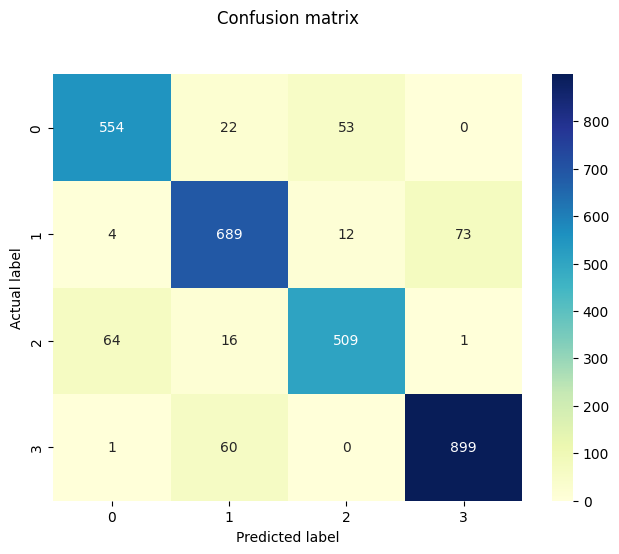

In [18]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

class_names=[0,1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
import pickle
knn_file = 'knn.sav'
pickle.dump(knn, open(knn_file, 'wb'))
rf_file = 'rf.sav'
pickle.dump(rf, open(rf_file, 'wb'))
svm_file = 'svm.sav'
pickle.dump(sm, open(svm_file, 'wb'))

dtree_file = 'dtree.sav'
pickle.dump(dtree, open(dtree_file, 'wb'))
gbdt_file = 'gbdt.sav'
pickle.dump(gbdt, open(gbdt_file, 'wb'))

scaler_file = 'scaler.sav'
pickle.dump(scaler, open(scaler_file, 'wb'))

In [20]:
from sklearn import model_selection
# loaded_nn1 = pickle.load(open('/home/phong/project/training_phase/nn11.sav', 'rb'))
loaded_knn = pickle.load(open('/home/phong/project/machine-learning/training_phase/knn.sav', 'rb'))
loaded_rf = pickle.load(open('/home/phong/project/machine-learning/training_phase/rf.sav', 'rb'))
loaded_svm = pickle.load(open('/home/phong/project/machine-learning/training_phase/svm.sav', 'rb'))
loaded_dtree = pickle.load(open('/home/phong/project/machine-learning/training_phase/dtree.sav', 'rb'))
loaded_gbdt = pickle.load(open('/home/phong/project/machine-learning/training_phase/gbdt.sav', 'rb'))
loaded_scaler = pickle.load(open('/home/phong/project/machine-learning/training_phase/scaler.sav', 'rb'))

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import numpy as np
# cl7 = KNeighborsClassifier(n_neighbors=16, weights='distance', p= 1)
# # cl7 = GaussianNB()
# cl6 = LogisticRegression(penalty ='l2',C = 611.9717284983775 ,solver='saga')
# cl3 = DecisionTreeClassifier(criterion="entropy", max_depth=27)
# cl4 =RandomForestClassifier(n_estimators=81, max_depth=28,)
# cl5 = svm.SVC(C=217.89654436207158, kernel='rbf', degree=5, gamma=0.35886830602406034)
# cl2 = MLPClassifier(hidden_layer_sizes=(15,15,15),activation='relu', solver='adam', max_iter=1000,random_state=1)
# cl1 = MLPClassifier(hidden_layer_sizes=(23, 28, 14, 19),activation='relu', solver='adam', max_iter=400,random_state=1)
# voting_clf = VotingClassifier(
#     estimators=[
#         ('knn',loaded_nn2),
#         ('rf',loaded_rf),
#         ('svm',loaded_svm),
#         ('logreg',loaded_logreg),
#         ('nb', loaded_nb)
#     ],
#     voting='hard'
# )
voting_clf = VotingClassifier(
    estimators=[
        ('knn',loaded_knn),
        ('rf',loaded_rf),
        ('svm',loaded_svm),
        ('logreg',loaded_dtree),
        ('gbdt', loaded_gbdt)
    ],
    voting='hard'
)
# Huấn luyện mô hình ensemble với dữ liệu huấn luyện
voting_clf.fit(X_train, Y_train)
# print(prediction)
# print('accuracy in test')
# print(accuracy_score(prediction, Y_test))
# score = cross_val_score(voting_clf,X_train1,Y_train1,cv=5).mean()
# print('cross_validation',score)
# print('accuracy in valid data',accuracy_score(predicion_val, Y_val))


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_neighbors=16, p=1,
                                                   weights='distance')),
                             ('rf',
                              RandomForestClassifier(max_depth=28,
                                                     max_features='sqrt',
                                                     n_estimators=81)),
                             ('svm',
                              SVC(C=217.89654436207158, degree=5,
                                  gamma=0.35886830602406034)),
                             ('logreg',
                              DecisionTreeClassifier(max_depth=11,
                                                     min_samples_split=3)),
                             ('gbdt',
                              GradientBoostingClassifier(learning_rate=0.06450229468622692,
                                                         max_depth=10,
                   

In [22]:
Voting_file = 'voting.sav'
pickle.dump(voting_clf, open(Voting_file, 'wb'))

In [23]:
loaded_voting = pickle.load(open('/home/phong/project/machine-learning/training_phase/voting.sav', 'rb'))
vot_arr = loaded_voting.predict(X_test)
print(vot_arr)
print(vot_arr.shape)
# counts = np.bincount(vot_arr)
# most_common = np.argmax(counts)
print('accuracy in test data : ',metrics.accuracy_score(vot_arr,Y_test))
print('cross validation in train data : ',cross_val_score(loaded_voting,X_train,Y_train,cv =5).mean())
print(classification_report(vot_arr,Y_test))

[1 1 2 ... 2 2 1]
(2957,)
accuracy in test data :  0.903280351707812
cross validation in train data :  0.8846340672877826
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       646
           1       0.88      0.89      0.89       766
           2       0.85      0.91      0.88       553
           3       0.95      0.92      0.94       992

    accuracy                           0.90      2957
   macro avg       0.90      0.90      0.90      2957
weighted avg       0.90      0.90      0.90      2957



In [25]:
from fastapi import FastAPI
from pydantic import BaseModel
from sklearn.ensemble import VotingClassifier
import pickle
import numpy as np
import datetime
import pytz
import json

from fastapi.middleware.cors import CORSMiddleware

# Load model and stuff
loaded_knn = pickle.load(open('/home/phong/project/machine-learning/training_phase/knn.sav', 'rb'))
loaded_rf = pickle.load(open('/home/phong/project/machine-learning/training_phase/rf.sav', 'rb'))
loaded_svm = pickle.load(open('/home/phong/project/machine-learning/training_phase/svm.sav', 'rb'))
loaded_dtree = pickle.load(open('/home/phong/project/machine-learning/training_phase/dtree.sav', 'rb'))
loaded_gbdt = pickle.load(open('/home/phong/project/machine-learning/training_phase/gbdt.sav', 'rb'))
loaded_scaler = pickle.load(open('/home/phong/project/machine-learning/training_phase/scaler.sav', 'rb'))
loaded_voting = pickle.load(open('/home/phong/project/machine-learning/training_phase/voting.sav', 'rb'))
weather_cond = ['Clear', 'Cloud', 'Sunny', 'Rainy']
# End of model and stuff


class WeatherData(BaseModel):
    temperature: float
    wind_speed: float
    pressure: int
    humidity: int
    vis_km: int
    cloud: int


X = np.array([[weather_data.temperature, weather_data.wind_speed, weather_data.pressure,
                 weather_data.humidity, weather_data.vis_km, weather_data.cloud]])
X = loaded_scaler.transform(X)
    # tmp_arr = [0, 0, 0, 0]
    # nn1_arr = loaded_nn1.predict(X)
    # nn2_arr = loaded_nn2.predict(X)
    # dtree_arr = loaded_dtree.predict(X)
    # rf_arr = loaded_rf.predict(X)
    # svm_arr = loaded_svm.predict(X)
    # logreg_arr = loaded_logreg.predict(X)
    # nb_arr = loaded_nb.predict(X)
    #--------------------------------#
    #voting_arr = loaded_voting.predict(X)
voting_arr = np.squeeze(loaded_voting.predict(X))
    # counts = np.bincount(voting_arr)
    # most_common = np.argmax(counts)
    #------------------------------#
    # ensample process
    # if nn1_arr == 0:
    #     tmp_arr[0] += 0.9
    # elif nn1_arr == 1:
    #     tmp_arr[1] += 0.8
    # elif nn1_arr == 2:
    #     tmp_arr[2] += 1
    # elif nn1_arr == 3:
    #     tmp_arr[3] += 0.9

    # if nn2_arr == 0:
    #     tmp_arr[0] += 0.9
    # elif nn2_arr == 1:
    #     tmp_arr[1] += 0.8
    # elif nn2_arr == 2:
    #     tmp_arr[2] += 1
    # elif nn2_arr == 3:
    #     tmp_arr[3] += 0.9

    # if dtree_arr == 0:
    #     tmp_arr[0] += 0.9
    # elif dtree_arr == 1:
    #     tmp_arr[1] += 0.8
    # elif dtree_arr == 2:
    #     tmp_arr[2] += 1
    # elif dtree_arr == 3:
    #     tmp_arr[3] += 0.9

    # if rf_arr == 0:
    #     tmp_arr[0] += 1
    # elif rf_arr == 1:
    #     tmp_arr[1] += 0.8
    # elif rf_arr == 2:
    #     tmp_arr[2] += 1.2
    # elif rf_arr == 3:
    #     tmp_arr[3] += 1

    # if svm_arr == 0:
    #     tmp_arr[0] += 0.7
    # elif svm_arr == 1:
    #     tmp_arr[1] += 0.5
    # elif svm_arr == 2:
    #     tmp_arr[2] += 0.8
    # elif svm_arr == 3:
    #     tmp_arr[3] += 0.7

    # if logreg_arr == 0:
    #     tmp_arr[0] += 0.7
    # elif logreg_arr == 1:
    #     tmp_arr[1] += 0.5
    # elif logreg_arr == 2:
    #     tmp_arr[2] += 0.8
    # elif logreg_arr == 3:
    #     tmp_arr[3] += 0.7

    # if nb_arr == 0:
    #     tmp_arr[0] += 0.6
    # elif nb_arr == 1:
    #     tmp_arr[1] += 0.5
    # elif nb_arr == 2:
    #     tmp_arr[2] += 0.7
    # elif nb_arr == 3:
    #     tmp_arr[3] += 0.6

    # if tmp_arr[0] == max(tmp_arr):
    #     res = 0
    # elif tmp_arr[1] == max(tmp_arr):
    #     res = 1
    # elif tmp_arr[2] == max(tmp_arr):
    #     res = 2
    # elif tmp_arr[3] == max(tmp_arr):
    #     res = 3
print(weather_cond[voting_arr])


ModuleNotFoundError: No module named 'db'